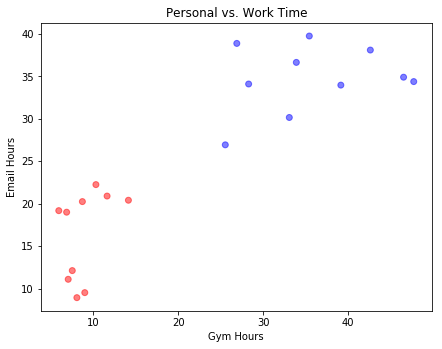

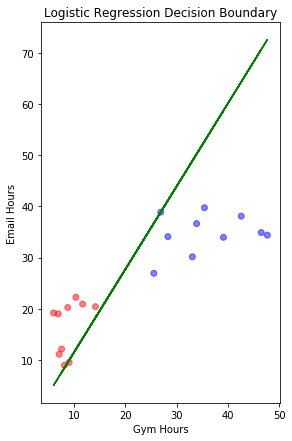

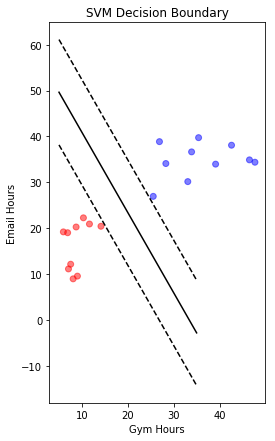

Logit sum of margin: 133.1720885296021
SVC sum of margin: 325.4775009051034
[0.07717109 0.02350117 0.10464642]


In [6]:
# individual_solns.py
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Part 1 question 1
def plot_data_basic(X, y):
    """Plots a scatter plot for data_scientist.csv using

    Parameters
    ----------
    X : the dataset from data_scientist.csv with 'gym_hours' as col 0 and 'email_hours' as col 1
    y : the label `data_scientist` in data_scientist.csv

    Returns
    -------
    None
    """
    colors = ['red' if x else 'blue' for x in y]
    fig = plt.figure(figsize=(7,7))
    ax = fig.add_subplot(111)
    ax.scatter(X[:,0], X[:,1], color=colors, alpha=0.5)
    ax.set_title('Personal vs. Work Time')
    ax.set_xlabel('Gym Hours')
    ax.set_ylabel('Email Hours')
    ax.set_aspect('equal')
    plt.show()


# Part 1 questions 3 and 5
def plot_logit_decision(logreg_clf, X, y, label_sizes=None):
    """Plots the Logistic Regression decision boundary over a scatter plot of data_scientist.csv

    Parameters
    ----------
    logreg_clf : a LogisticRegression model as returned by LogisticRegression().fit()
    X : the dataset from data_scientist.csv with 'gym_hours' as col 0 and 'email_hours' as col 1
    y : the label in data_scientist.csv (1 for red, 0 for blue)
    label_sizes : (for question 1.5) an array corresponding to shape of y, indicating for each point its size on plot

    Returns
    -------
    None
    """
    # Calculate boundary
    colors = ['red' if x else 'blue' for x in y]
    x = X[:, 0]
    coefs = logreg_clf.coef_.squeeze()
    y = lambda x: -1. * (logreg_clf.intercept_[0] + coefs[0] * x) / coefs[1]

    # Plot
    fig = plt.figure(figsize=(7,7))
    ax = fig.add_subplot(111)
    ax.plot(x, y(x), color='green')

    # if label_sizes are provided, use that as an argument of ax.scatter
    if (label_sizes is not None) :
        ax.scatter(X[:,0], X[:,1], color=colors, s=label_sizes, alpha=0.5)
    else:
        ax.scatter(X[:,0], X[:,1], color=colors, alpha=0.5)

    ax.set_title('Logistic Regression Decision Boundary')
    ax.set_xlabel('Gym Hours')
    ax.set_ylabel('Email Hours')
    ax.set_aspect('equal')
    plt.show()


# Part 1 question 4
def calc_logreg_margin(logreg_clf, X):
    """Computes the margin for each observation in X

    Parameters
    ----------
    logreg_clf : a LogisticRegression model as returned by LogisticRegression().fit()
    X : the dataset from data_scientist.csv with 'gym_hours' as col 0 and 'email_hours' as col 1

    Returns
    -------
    array : the margin computed for each row of X.
    """
    coefs = logreg_clf.coef_.squeeze()
    dist = abs(logreg_clf.intercept_ + np.dot(X, coefs)) / np.linalg.norm(coefs)
    return dist.ravel()


# Part 2 question 2 and question 4
def plot_svm_decision(svc_clf, X, y, label_sizes=None):
    """Plots the Support Vector Classifier decision boundary over a scatter plot of data_scientist.csv

    Parameters
    ----------
    svc_clf : a SVC model as returned by SVC().fit()
    X : the dataset from data_scientist.csv with 'gym_hours' as col 0 and 'email_hours' as col 1
    y : the label in data_scientist.csv (1 for red, 0 for blue)
    label_sizes : (for question 2.4) an array corresponding to shape of y, indicating for each point its size on plot

    Returns
    -------
    None
    """
    # get the separating hyperplane
    w = svc_clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(5, 35)
    yy = a * xx - (svc_clf.intercept_[0]) / w[1]

    # plot the parallels to the separating hyperplane that pass through the
    # support vectors
    margin = 1 / np.sqrt(np.sum(svc_clf.coef_ ** 2))
    yy_down = yy + a * margin
    yy_up = yy - a * margin

    # plot the line, the points, and the nearest vectors to the plane
    colors = ['red' if x else 'blue' for x in y]
    fig = plt.figure(figsize=(7,7))
    ax = fig.add_subplot(111)

    # if label_sizes are provided, use that as an argument of ax.scatter
    if (label_sizes is not None) :
        ax.scatter(X[:,0], X[:,1], color=colors, s=label_sizes, alpha=0.5)
    else:
        ax.scatter(X[:,0], X[:,1], color=colors, alpha=0.5)

    ax.plot(xx, yy, 'k-')
    ax.plot(xx, yy_down, 'k--')
    ax.plot(xx, yy_up, 'k--')
    ax.set_title('SVM Decision Boundary')
    ax.set_xlabel('Gym Hours')
    ax.set_ylabel('Email Hours')
    ax.set_aspect('equal')
    plt.show()


# Part 2 question 3
def calc_svm_margin(svc_clf, X):
    """Computes the margin for each observation in X

    Parameters
    ----------
    svc_clf : a SVC model as returned by SVC().fit()
    X : the dataset from data_scientist.csv with 'gym_hours' as col 0 and 'email_hours' as col 1

    Returns
    -------
    array : the margin computed for each row of X.
    """
    coefs = svc_clf.coef_.squeeze()
    dist = abs(svc_clf.intercept_ + np.dot(X, coefs)) / np.linalg.norm(coefs)
    return dist.ravel()


# NOTE: below are functions used in the extra credit
def loss(coefs):
    """Returns the loss of given coefficients.

    Parameters
    ----------
    coefs : a 1d numpy array providing coefficients

    Returns
    -------
    float : the loss of the given coefficients
    """
    return 0.5 * np.linalg.norm(coefs)**2


def loss_gradient(coefs):
    """Returns the gradient loss of given coefficients.

    Parameters
    ----------
    coefs : a 1d numpy array providing coefficients

    Returns
    -------
    array : the gradient
    """
    return coefs # Just to show that the derivative of 1/2 norm(Beta)**2 equals Beta

def constraint(X, y, coefs):
    """Returns True or False on if constraint is maintained.

    Parameters
    ----------
    X : 2d numpy array
    y : 1d numpy array
    coefs : 1d numpy array

    Returns
    -------
    Boolean : indicates if constraint maintained
    """
    n = y.shape[0]
    return np.dot(y.T, np.dot(X, coefs)) >= n


def gradient_descent(X, y, alpha, gradient, add_intercept=True, step_size=None, num_iterations = 10000):
    """Use gradient descent to find the Beta that minimizes the loss function.

    Parameters
    ----------
    X: 2d numpy array
    y: 1d numpy array
    alpha: float
    gradient: gradient function
    add_intercept: Boolean
    step_size: float
    num_iterations: int

    Returns
    -------
    coefs: 2d numpy array
    """
    if add_intercept:
        X = np.hstack((np.ones((X.shape[0], 1)), X))

    coefs = np.random.rand(X.shape[1])

    if step_size is None:
        for i in xrange(num_iterations):
            if constraint(X, y, coefs):
                coefs -= alpha / y.shape[0] * gradient(coefs)
            else:
                break
    else:
        diff = step_size
        old_loss = 100000.
        while diff >= step_size and constraint(X, y, coefs):
            coefs -= alpha / y.shape[0] * gradient(coefs)
            total_loss = loss(coefs)
            diff = np.abs((total_loss - old_loss) / old_loss)
            old_loss = total_loss
    return coefs


# NOTE: there is a notebook version of that process in individual_solns.ipynb
if __name__ == '__main__':
    # First look at the data
    df = pd.read_csv('data/data_scientist.csv')
    X = df[['gym_hours', 'email_hours']].values
    y = df['data_scientist'].values
    plot_data_basic(X,y)

    # Fit and visualize Logistic Regression
    clf = LogisticRegression().fit(X, y)
    plot_logit_decision(clf, X, y)

    # Fit and visualize SVM
    svc_clf = SVC(kernel='linear').fit(X, y)
    plot_svm_decision(svc_clf, X, y)

    # Calculate margins
    logit_margin = calc_logreg_margin(clf, X)
    svm_margin = calc_svm_margin(svc_clf, X)
    print ('Logit sum of margin:', np.sum(logit_margin))
    print ('SVC sum of margin:', np.sum(svm_margin))

    '''
    Part 2.5
    A large margin means that it is less likely to overfit, reducing the variance of the model.
    The large margin allows for more flexibility for data of the same class that may extend further
    from the expected grouping.  In the case of the current data, logistic regression would have mis-classified
    the case where email hours = 9.5 and gym_hours = 9.
    '''

    # Extra credit
    print (gradient_descent(X, y, alpha=0.001, gradient=loss_gradient, step_size=0.0000001))


In [2]:
from individual_solns import *
%matplotlib inline

SyntaxError: invalid syntax (individual_solns.py, line 258)

# Introduction: Support Vector Machine (SVM)

The support vector machine is a maximal margin classifier that seeks to construct a hyperplane that linearly separates training observations of one class from the other class. To aid the learning process, we'll demonstrate how logistic regression compares to SVMs when separating classes (see image below).

For this individual assignment, we will only consider the case where the two classes are linearly separable. In most applications, classes are not linearly separable from one another, and the hinge loss function (covered in the afternoon) would have to be taken into account as well.

<div align="center">
    <img height="500" src="images/svm_lr.png">
</div>

1\. Use the template that is provided for you in `src/logit_svm_margin.py` to complete this exercise.

2\. You are given a dataset about the weekly hours spent in gym and spent emailing for data scientist and non data scientist. Load the file `data/data_scientist.csv` into a dataframe. **Note**: for consistency of your plots, be sure to use 'gym_hours' as first attribute and 'email_hours' as second.

In [2]:
df = pd.read_csv('data/data_scientist.csv')
X = df[['gym_hours', 'email_hours']].values
y = df['data_scientist'].values

# Part 1: Margin of Logistic Regression Boundary

Logistic Regression is similar to the Support Vector Machine, except Logistic Regression minimizes [logistic loss (See diagram in 1.4)](http://www.stat.ucla.edu/~ywu/AB/adjust.html) and does not explicitly maximize the margin. We will here use the `LogisticRegression` from `sklearn` and plot its decision boundaries on a scatter plot of the data and their classes.

1\. Implement the function `plot_data_basic` to make a scatter plot of `gym_hours` against `email_hours` where each of the two labels should be of a different color. `plt.scatter` takes a `color` argument which can be specified as a list of colors.

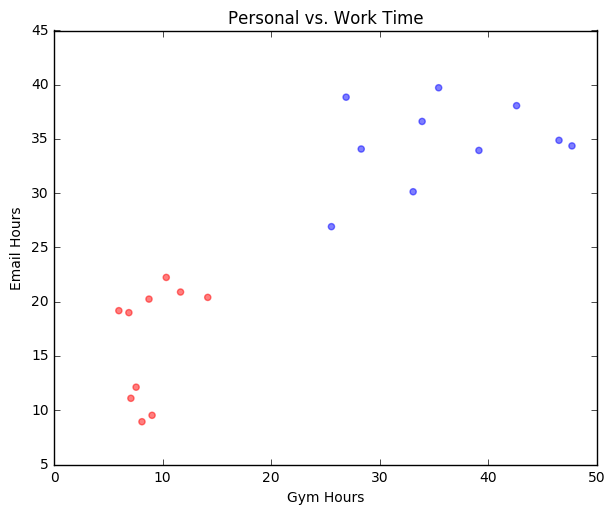

In [3]:
plot_data_basic(X,y)

2\. Fit `LogisticRegression` with `gym_hours` and `email_hours` as features and `data_scientist` as the response.

In [12]:
clf1 = LogisticRegression(intercept_scaling=1).fit(X, y)

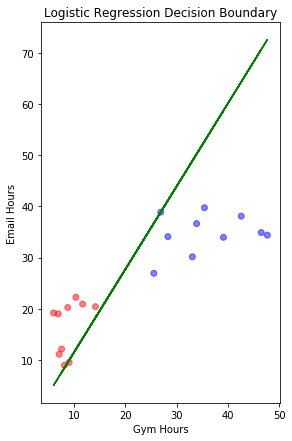

In [13]:
plot_logit_decision(clf1, X, y)

In [4]:
clf = LogisticRegression(intercept_scaling=100).fit(X, y)

3\. Implement the function `plot_logit_decision` to compute and plot the decision boundary. Remember `y` is `0` at the decision boundary when the probability of a positive class is `0.5`. So, you can define a range over one of your features (`gym_hours` for example) and compute the corresponding value for the other (`email_hours`) at the decision boundary. To do that, you will need to access the weights computed by `LogisticRegression`.

Use that function to plot your decision boundaries. Try to modify `intercept_scaling` in the parameters of `LogisticRegression`.

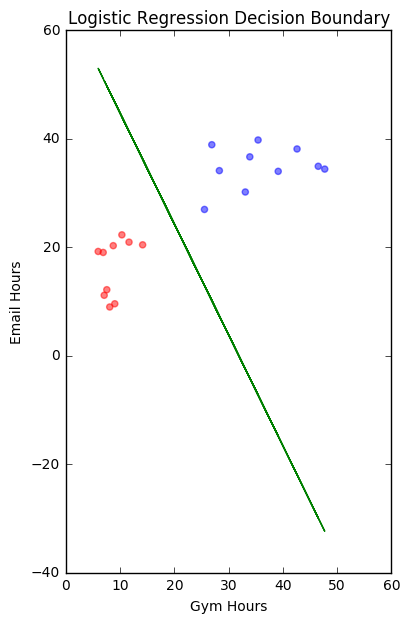

In [5]:
plot_logit_decision(clf, X, y)

4\. The distance from the decision boundary is defined as below, where ![image](images/beta_norm.png) is the L2 norm of beta coefficients of the logistic regression. Read more under the [Large margin classification mathematics](http://www.holehouse.org/mlclass/12_Support_Vector_Machines.html) section if you are interested in derivations of the margin formulation.

   ![image](images/margin_def.png)

   Implement the function `calc_logreg_margin` to compute and return the distance of each of the points from the decision boundary. Compute the sum of these distances.

In [6]:
logit_margin = calc_logreg_margin(clf, X)

5\. Modify the `plot_logit_decision` function from question 3 to accept a `label_sizes` argument, where the size of the scatter points will be determined by the distance of the data point from the decision boundary. `plt.scatter` takes a `s` argument of a list of marker sizes. For the marker size to be in the right range, the distance should be multiplied by `100`.

   ![image](images/logit_margin.png)

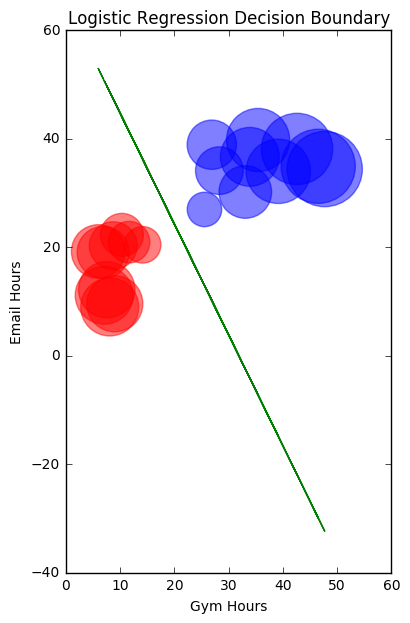

In [7]:
plot_logit_decision(clf, X, y, logit_margin*100)

# Part 2: Margin of Support Vector Machine Boundary

SVM is a maximal margin classifier which in theory would have a larger margin than Logistic Regression. Let's verify the theory.

1\. Fit the classifier `SVC` (from `sklearn`) with `gym_hours` and `email_hours` as features and `data_scientist` as the response. Use a `'linear'` kernel.

In [8]:
svc_clf = SVC(kernel='linear').fit(X, y)

2\. Use the following function to plot the `SVC` decision boundary.

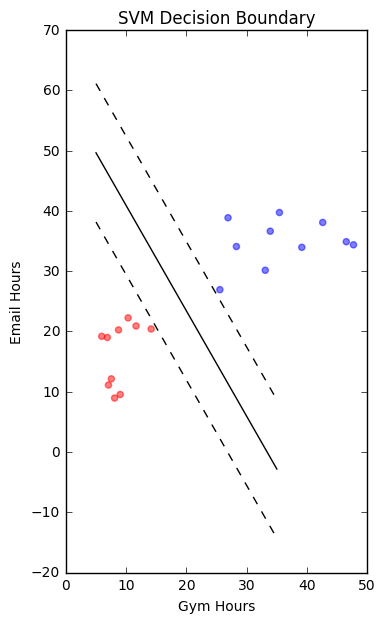

In [9]:
plot_svm_decision(svc_clf, X, y)

3\. Implement the function `calc_svm_margin` to compute and return the distance of each of the points from the decision boundary. Compute the sum of these distances.

In [10]:
# Calculate margins
svm_margin = calc_svm_margin(svc_clf, X)
print 'Logit sum of margin:', np.sum(logit_margin)
print 'SVC sum of margin:', np.sum(svm_margin)

Logit sum of margin: 323.146879305
SVC sum of margin: 325.477500905


4\. Using function `plot_svm_decision`, Make another plot where the size of scatter points indicates the size of the distances from the SVC decision boundary.
   ![image](images/svc_margin.png)

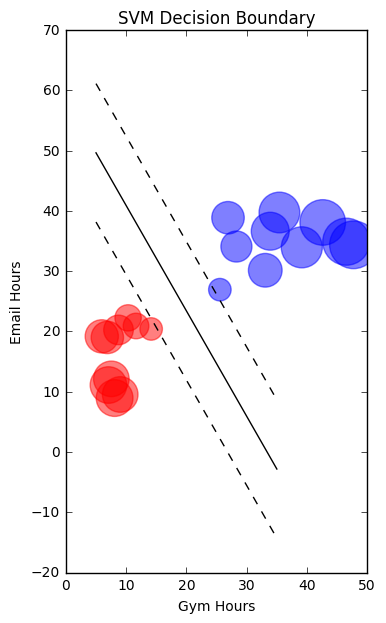

In [11]:
plot_svm_decision(svc_clf, X, y, svm_margin*40)

5\. What is the advantage of having a large margin? Compare the Logistic case vs. the SVM case, for a data scientist who emails 2.5 hours a week and gyms for 10 hours.

*A large margin means that it is less likely to overfit, reducing the variance of the model. The large margin allows for more flexibility for data of the same class that may extend further from the expected grouping.  In the case of the current data, logistic regression would have mis-classified the case where email hours = 9.5 and gym_hours = 9.*

# Extra Credit: Write your own maximal margin optimizer

1\. **Optional:** In order to find the beta coefficients that would maximize the margin, below are the formulations for the parameter space and the loss function.


   Parameter Space:

   ![image](images/svm_1.png)

   Loss Function:

   ![image](images/svm_2.png)

   Write a function that would take a random set of beta coefficients and optimize towards the set of beta coefficients that would maximize the margin.

In [12]:
print gradient_descent(X, y, alpha=0.001, gradient=loss_gradient, step_size=0.0000001)

[ 0.06837007  0.09694471  0.06507501]
